# Exploratory analysis

C:\Users\Dell\AppData\Local\Temp\ipykernel_2916\2468925737.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_diabetes_counts = df.groupby(["AgeGroup", "Outcome"]).size().unstack()


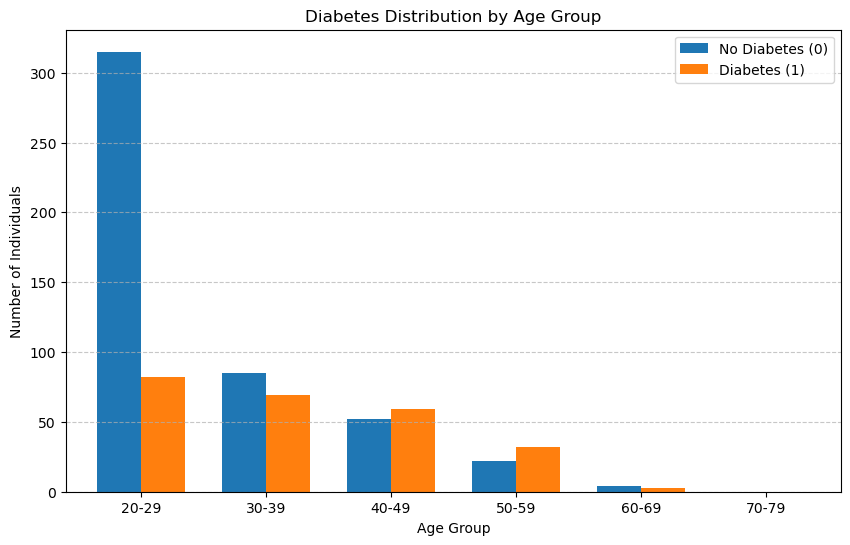

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes_preprocessed.csv")

bins = [20, 30, 40, 50, 60, 70, 80]
labels = ["20-29", "30-39", "40-49", "50-59", "60-69", "70-79"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

age_diabetes_counts = df.groupby(["AgeGroup", "Outcome"]).size().unstack()

age_diabetes_counts.plot(kind="bar", figsize=(10,6), width=0.7)

plt.title("Diabetes Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Individuals")
plt.xticks(rotation=0)
plt.legend(["No Diabetes (0)", "Diabetes (1)"])
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

df = df.drop(columns=["AgeGroup"])

In younger age groups, up to 40 years old, most people do not have diabetes. The graph shows that the biggest difference is in the category of people aged up to 29, where there are significantly more individuals without diabetes. On the other hand, in the older population, the probability of having more people with diabetes increases.

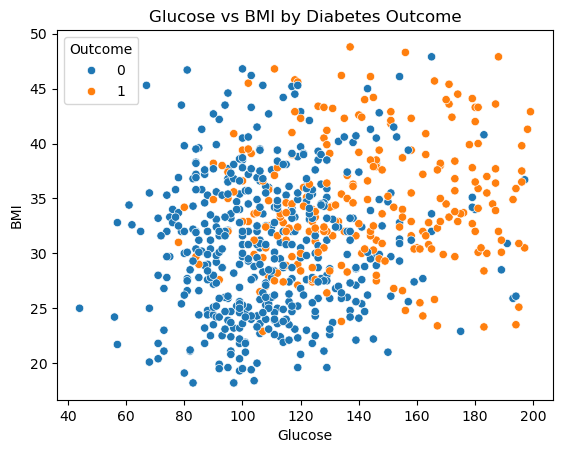

In [11]:
sns.scatterplot(x="Glucose", y="BMI", hue="Outcome", data=df)
plt.title("Glucose vs BMI by Diabetes Outcome")
plt.show()

People with lower BMI and lower glucose levels predominantly do not have diabetes. On the other hand, the graph shows that as these two variables increase, the likelihood of having diabetes also rises.

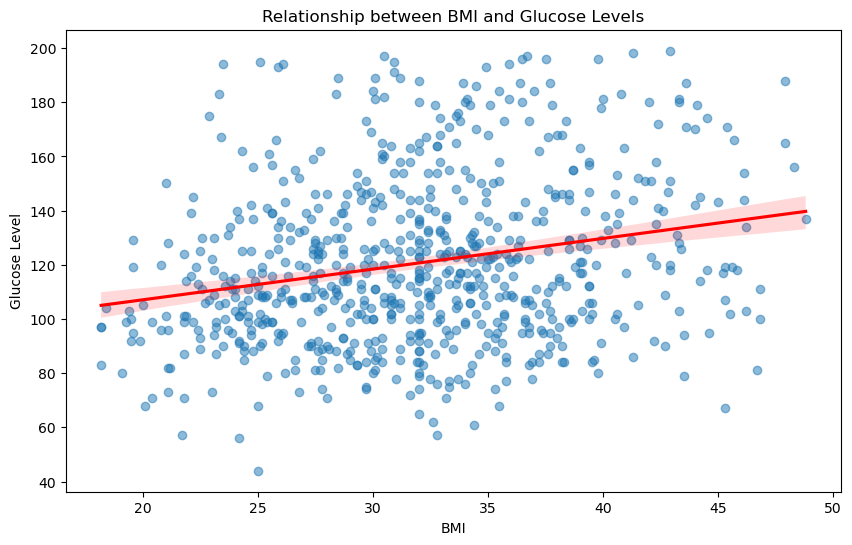

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.regplot(x=df["BMI"], y=df["Glucose"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("BMI")
plt.ylabel("Glucose Level")
plt.title("Relationship between BMI and Glucose Levels")
plt.show()


In [13]:
correlation = df["BMI"].corr(df["Glucose"])
print(f"Correlation between BMI and Glucose: {correlation:.2f}")


Correlation between BMI and Glucose: 0.24


The plot clearly shows that the observations are scattered around the regression line, indicating that BMI and glucose are not highly correlated. This was important to verify, given the previous conclusion we made when comparing how the results behave by analyzing these two parameters.